In [112]:
import numpy as np
import os

In [113]:
path = os.path.realpath("GivenConnect.ipynb")
dir = os.path.dirname(path)
dir = dir.replace("arbors", "WCandCD")
os.chdir(dir)
%run Networks.ipynb  
dir = dir.replace("WCandCD", "arbors")
os.chdir(dir)

In [114]:
def findMainRootConnections(plant):
    mainRootNodes =[]
    c=0
    Plant1= plant
    rootBases =[]
    for node in plant.nodes():
        c = c+1
        if plant.nodes[node]['label'] == 'main root':
            mainRootNodes.append(node)
        elif plant.nodes[node]['label'] == 'main root base':
            mainRootNodes.append(node)
        elif plant.nodes[node]['label'] == 'lateral root base':
            rootBases.append(node)
        else:
            continue 
    for rootBase in rootBases:
        if plant.nodes[rootBase]['label'] != 'lateral root base':
            continue
        rx,ry = plant.nodes[rootBase]['coordinate']
        main1x, main1y =0,0
        main2x, main2y =0,0
        for i in range(0, len(mainRootNodes)-1):
            m1x,m1y = plant.nodes[mainRootNodes[i]]['coordinate']
            m2x, m2y = plant.nodes[mainRootNodes[i+1]]['coordinate']
            if m1y <= ry:
                if m2y >= ry:
                    main1x,main1y = m1x,m1y
                    main2x, main2y =m2x,m2y
                    break                
        rootNumber = plant.nodes[rootBase]['root number']
        Plant1.add_node(c)
        Plant1._node[c]['label'] = 'connection'
        m = (main2y-main1y)/(main2x-main1x)
        x = ((ry -main2y)/m)+main2x
        Plant1._node[c]['coordinate'] = (x,ry)
        Plant1._node[c]['root number'] = rootNumber
        Plant1.add_edge(c, rootBase)
        length = np.sqrt((plant._node[c]['coordinate'][0] - plant._node[rootBase]['coordinate'][0])**2 +(plant._node[c]['coordinate'][1] -plant._node[rootBase]['coordinate'][1])**2)
        Plant1[c][rootBase]['length'] = length
        Plant1[c][rootBase]['root number'] = rootNumber
        Plant1[c][rootBase]['G'] = 0
        Plant1[c][rootBase]['label'] = 'lateral root'
        c=c+1
    return(Plant1)
# takes given networx arbor as input 
#returns given networx arbor with connections to main root

original


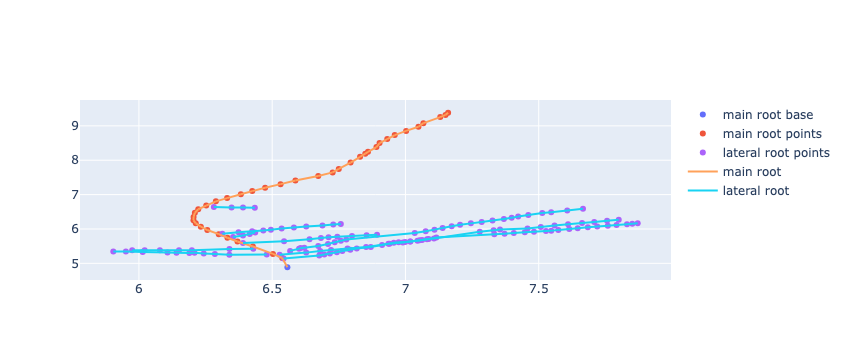

optimal given:  0   1


optimal and original super imposed given:  0 ,  1


original


wiring cost:  12.471443678665112
conduction delaty:  43.760303260826326
